In [6]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = 'https://www.amazon.in/s?k=MOBILES&crid=308ZUQZ26RJVG&sprefix=mobiles%2Caps%2C255&ref=nb_sb_noss_1'

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the text from the page (this will vary depending on the website structure)
text = soup.get_text()

text


"\n\n503 - Service Unavailable Error\n\n\n\n\n\n\n\n\nOops!\nIt's rush hour and traffic is piling up on that page. Please try again in a short while.If you were trying to place an order, it will not have been processed at this time.\n\nGo to the Amazon.in home page to continue shopping\n\n\n\n\n"

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and process the text
def process_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and non-alphabetic characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    
    # Split text into words
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

# Process the scraped text
processed_text = process_text(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


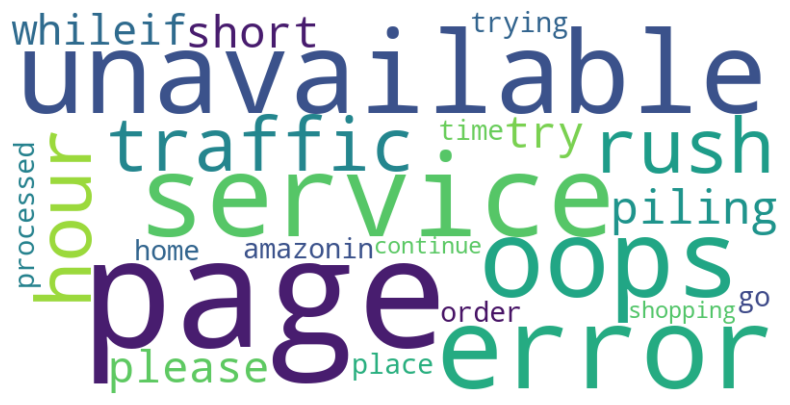

In [8]:
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
